In [1]:
import tensorflow as tf 
from tensorflow import keras
print(tf.__version__)
print(keras.__version__)

2.4.0-rc0
2.4.0


In [2]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [6]:
print("Training Set Shape: ", X_train_full.shape)
print("Training Set dtype: ", X_train_full.dtype)

Training Set Shape:  (60000, 28, 28)
Training Set dtype:  uint8


In [7]:
# Split and Scale the training set
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [43]:
# MNIST Labels 
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]
class_names[y_train[0]]

'Coat'

In [10]:
# Building a Simple Sequential Neural Network 
# Layer 1 - Input Flatten/Reshape Layer -> Each Input to 1D
# Layer 2 - Hidden Dense Layer with 300 Neurons, relu activation
# Layer 3 - Hidden Dense Layer with 100 Neurons, relu activation
# Layer 4 - Output Layer with 10 Neurons (one for each class), softmax activation

model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation='relu'))
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 300)               235500    
_________________________________________________________________
dense_3 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_4 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [11]:
model.layers

In [12]:
hidden1 = model.layers[1]
hidden1.name

'dense_2'

In [13]:
model.get_layer('dense_2') is hidden1

True

In [14]:
weights, biases = hidden1.get_weights()
weights

array([[ 0.06226768, -0.04512075,  0.03763639, ...,  0.00054774,
        -0.01289019,  0.0455749 ],
       [ 0.04813736, -0.06681715, -0.06095926, ..., -0.06477585,
         0.03259063,  0.07379855],
       [-0.05928892,  0.00422578,  0.07104243, ..., -0.00722498,
         0.01765069,  0.00311299],
       ...,
       [-0.04032522,  0.04493924,  0.01138504, ...,  0.06114285,
         0.01632794,  0.06795675],
       [-0.02124541,  0.0146628 ,  0.03485613, ..., -0.01574116,
         0.0210005 , -0.036422  ],
       [-0.00898516,  0.0524791 ,  0.01227229, ..., -0.05652378,
         0.07387827, -0.03989282]], dtype=float32)

In [15]:
weights.shape

(784, 300)

In [16]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [17]:
biases.shape

(300,)

In [18]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])

In [19]:
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 1s 547us/step - loss: 0.9847 - accuracy: 0.6910 - val_loss: 0.5487 - val_accuracy: 0.8108
Epoch 2/30
1719/1719 [==============================] - 1s 475us/step - loss: 0.5056 - accuracy: 0.8246 - val_loss: 0.4327 - val_accuracy: 0.8520
Epoch 3/30
1719/1719 [==============================] - 1s 474us/step - loss: 0.4423 - accuracy: 0.8456 - val_loss: 0.4733 - val_accuracy: 0.8304
Epoch 4/30
1719/1719 [==============================] - 1s 473us/step - loss: 0.4187 - accuracy: 0.8541 - val_loss: 0.4016 - val_accuracy: 0.8624
Epoch 5/30
1719/1719 [==============================] - 1s 473us/step - loss: 0.3964 - accuracy: 0.8613 - val_loss: 0.4044 - val_accuracy: 0.8568
Epoch 6/30
1719/1719 [==============================] - 1s 473us/step - loss: 0.3719 - accuracy: 0.8683 - val_loss: 0.3876 - val_accuracy: 0.8614
Epoch 7/30
1719/1719 [==============================] - 1s 494us/step - loss: 0.3688 - accuracy: 0.8691 - val_loss: 0.3642 -

In [24]:
import matplotlib.pyplot as plt
%matplotlib inline

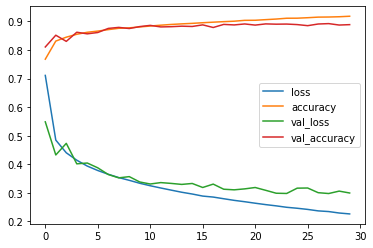

In [31]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_loss'], label='val_loss')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.legend()

In [32]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 414us/step - loss: 56.9557 - accuracy: 0.1024


[56.95568084716797, 0.10239999741315842]

In [33]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

array([[ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00, -0.0000000e+00,
         0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
         0.0000000e+00,  0.0000000e+00],
       [ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  3.6893488e+19,
         0.0000000e+00,  3.6893488e+19,  1.8664662e+08,  2.3549907e+20,
         2.4821391e+05,  3.9505281e+30],
       [ 6.8885191e+22,  0.0000000e+00,  6.7289760e+08,  9.1757001e+02,
         0.0000000e+00,  0.0000000e+00,  2.8125593e+15,  0.0000000e+00,
         0.0000000e+00,  3.6893488e+19]], dtype=float32)

In [34]:
y_pred = model.predict_classes(X_new)
y_pred

/Users/ryaneudy/Documents/Workspace/neural-networks-and-deep-learning/venv/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([2, 9, 0])

In [46]:
print(class_names[y_pred[0]])
print(class_names[y_pred[1]])
print(class_names[y_pred[2]])

Pullover
Ankle boot
T-shirt/top


In [47]:
y_new = y_test[:3]
y_new

array([9, 2, 1], dtype=uint8)